
**Conjunto de dados de comércio eletrônico de perfumes 2024**.

**Análise abrangente de fragrâncias no mercado de comércio eletrônico**

**Link dataset: https://www.kaggle.com/datasets/kanchana1990/perfume-e-commerce-dataset-2024/data**

**Artigo: Memória e imaginário feminino na compra de perfume**



**NBR 6023 - VIEIRA, F. Memória e imaginário feminino na compra de perfume. ENCONTRO DA, 2001.**



**Descrições das colunas**

**Marca** : A marca do perfume.

**Título** : O título do anúncio.

**type** : O tipo de perfume (por exemplo, Eau de Parfum, Eau de Toilette).

**Preço** : O preço do perfume.

**preçoComMoeda** : O preço com a notação monetária.

**Disponível** : Número de itens disponíveis.

**availableText** : Descrição textual da disponibilidade.

**Vendido** : Número de itens vendidos.

**lastUpdated** : Data e hora da última atualização do anúncio.

**itemLocation** : A localização do item.


# 1. Importação de Bibliotecas e Carregamento de Dados

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Carregando as bases do Kaggle

In [120]:

# Carregando as bases do Kaggle
df_men = pd.read_csv('./ebay_mens_perfume.csv')
df_women = pd.read_csv('./ebay_womens_perfume.csv')


# Adicionando identificador de gênero para análise comparativa


In [121]:
df_men['gender'] = 'Masculino'
df_women['gender'] = 'Feminino'

# Consolidação da Base de Dados



In [122]:
df = pd.concat([df_men, df_women], ignore_index=True)
df.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,gender
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States",Masculino
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada",Masculino
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States",Masculino
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States",Masculino
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States",Masculino



# ---------------------------------------------------------
# 2. Limpeza e Processamento de Dados
# ---------------------------------------------------------

In [123]:
# Tratamento de Marcas e Preços
df['brand'] = df['brand'].str.strip().str.title()
df['sold'] = df['sold'].fillna(0)
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0)
df.head()


,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,gender
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States",Masculino
1,As Show,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada",Masculino
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States",Masculino
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States",Masculino
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States",Masculino


In [124]:
# Categorização de Concentração (Dicotomia: Físico vs Simbólico)
def categorize_type(t):
    if pd.isna(t): return 'Outros'
    t = str(t).lower()
   # print(t)
    if 'parfum' in t:
        if 'eau de parfum' in t or 'edp' in t: return 'Eau de Parfum'
        return 'Parfum'
    elif 'toilette' in t or 'edt' in t: return 'Eau de Toilette'
    elif 'cologne' in t or 'edc' in t: return 'Cologne'
    return 'Outros'

df['concentration'] = df['type'].apply(categorize_type)
df.head(10)

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,gender,concentration
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States",Masculino,Eau de Parfum
1,As Show,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada",Masculino,Eau de Parfum
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States",Masculino,Eau de Toilette
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States",Masculino,Eau de Toilette
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States",Masculino,Outros
5,Multiple Brands,Men's Perfume Sampler 10pcs Sample Vials Desig...,Perfume,14.99,US $14.99,10.0,More than 10 available / 79 sold,79.0,"May 23, 2024 06:57:41 PDT","Houston, Texas, United States",Masculino,Outros
6,Maison Alhambra,Glacier Bold by Maison Alhambra 3.4oz EDP for ...,Eau de Parfum,30.99,US $30.99/ea,9.0,9 available / 39 sold,39.0,"May 16, 2024 13:42:49 PDT","Englewood Cliffs, New Jersey, United States",Masculino,Eau de Parfum
7,Unbranded,Parfums De-Marly-Haltane Eau de Parfum spray 4...,Eau de Parfum,85.00,US $85.00,NaN,Last One / 6 sold,6.0,"May 24, 2024 00:10:39 PDT","Ithaca, New York, United States",Masculino,Eau de Parfum
8,Unbranded,Hawas for him Eau De Parfum By Rasasi 100ml 3....,/,15.89,US $15.89,10.0,10 available / 17 sold,17.0,"May 24, 2024 09:08:14 PDT","shanghai, China",Masculino,Outros
9,Gucci,Gucci Guilty for Him - Classic 3oz Eau de Toil...,Eau de Parfum,49.99,US $49.99/ea,8.0,8 available / 68 sold,68.0,"May 23, 2024 07:21:23 PDT","Dearborn Heights, Michigan, United States",Masculino,Eau de Parfum


In [125]:
# Identificação de Produtos "Entry-Level" (Amostras, Testers, Minis)
def is_entry_level(title):
    title = str(title).lower()
    keywords = ['tester', 'vial', 'mini', 'sample', 'travel', 'open box', 'decant']
    return any(kw in title for kw in keywords)

df['is_entry_level'] = df['title'].apply(is_entry_level)
df.head(10)

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,gender,concentration,is_entry_level
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States",Masculino,Eau de Parfum,False
1,As Show,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada",Masculino,Eau de Parfum,False
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States",Masculino,Eau de Toilette,False
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States",Masculino,Eau de Toilette,False
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States",Masculino,Outros,False
5,Multiple Brands,Men's Perfume Sampler 10pcs Sample Vials Desig...,Perfume,14.99,US $14.99,10.0,More than 10 available / 79 sold,79.0,"May 23, 2024 06:57:41 PDT","Houston, Texas, United States",Masculino,Outros,True
6,Maison Alhambra,Glacier Bold by Maison Alhambra 3.4oz EDP for ...,Eau de Parfum,30.99,US $30.99/ea,9.0,9 available / 39 sold,39.0,"May 16, 2024 13:42:49 PDT","Englewood Cliffs, New Jersey, United States",Masculino,Eau de Parfum,False
7,Unbranded,Parfums De-Marly-Haltane Eau de Parfum spray 4...,Eau de Parfum,85.00,US $85.00,NaN,Last One / 6 sold,6.0,"May 24, 2024 00:10:39 PDT","Ithaca, New York, United States",Masculino,Eau de Parfum,False
8,Unbranded,Hawas for him Eau De Parfum By Rasasi 100ml 3....,/,15.89,US $15.89,10.0,10 available / 17 sold,17.0,"May 24, 2024 09:08:14 PDT","shanghai, China",Masculino,Outros,False
9,Gucci,Gucci Guilty for Him - Classic 3oz Eau de Toil...,Eau de Parfum,49.99,US $49.99/ea,8.0,8 available / 68 sold,68.0,"May 23, 2024 07:21:23 PDT","Dearborn Heights, Michigan, United States",Masculino,Eau de Parfum,False


# ---------------------------------------------------------
# 3. Análise Exploratória (EDA)
# ---------------------------------------------------------


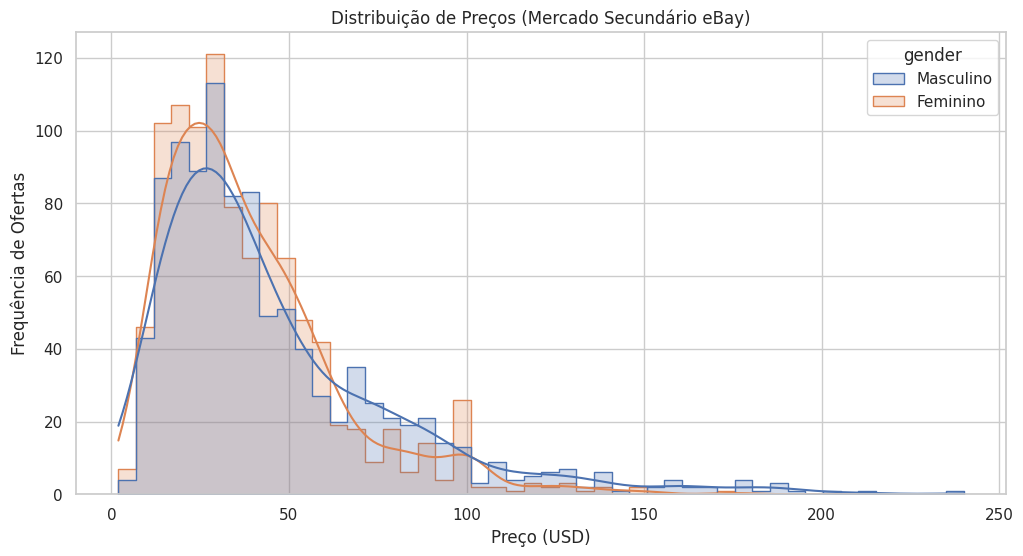

In [126]:
# Configuração de estilo
sns.set_theme(style="whitegrid")

# Visualização 1: Variação de Preço por Gênero
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['price'] < 250], x='price', hue='gender', element='step', kde=True)
plt.title('Distribuição de Preços (Mercado Secundário eBay)')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência de Ofertas')
plt.show()

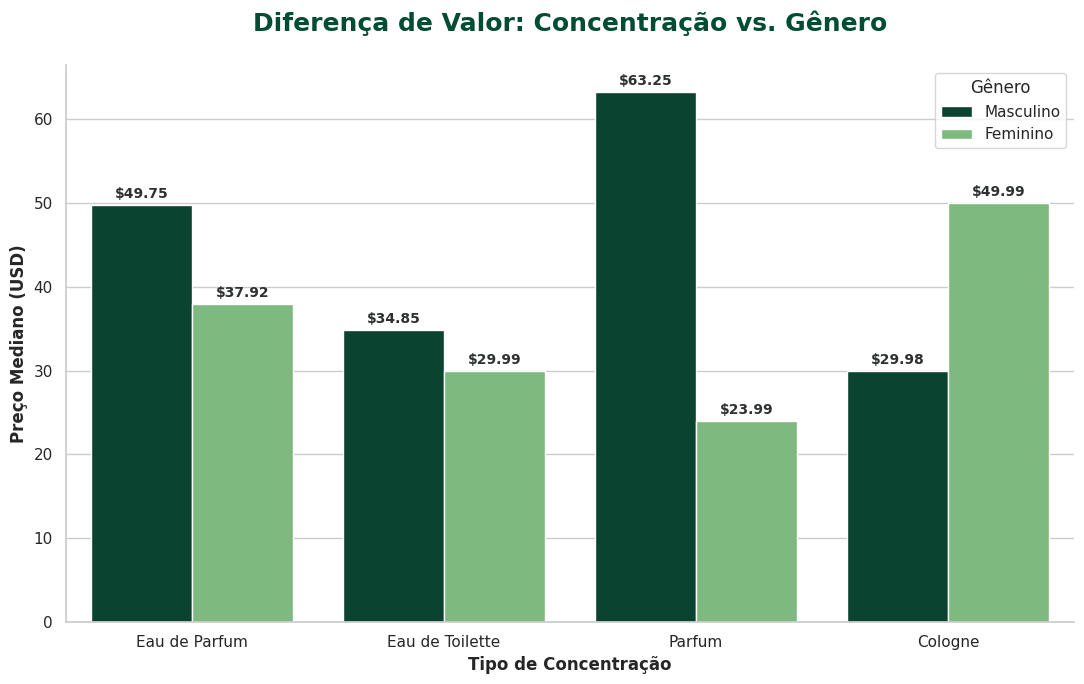

In [127]:

# 1. Configuração de Estilo e Paleta "Boticário" para Gênero
plt.figure(figsize=(11, 7))
sns.set_style("whitegrid")

# Cores: Verde Escuro (Masc) e Verde Médio/Claro (Fem)
boticario_gender_palette = {'Masculino': '#004d33', 'Feminino': '#74c476'}

# 2. Criação do Gráfico
main_cats = ['Eau de Parfum', 'Eau de Toilette', 'Parfum', 'Cologne']
bar_plot = sns.barplot(
    data=df[df['concentration'].isin(main_cats)],
    x='concentration',
    y='price',
    hue='gender',
    estimator=np.median,
    palette=boticario_gender_palette,
    errorbar=None  # Remove as barras de erro para um visual mais limpo em slides
)

# 3. Customização de Títulos e Eixos
plt.title('Diferença de Valor: Concentração vs. Gênero',
          fontsize=18, fontweight='bold', color='#004d33', pad=25)
plt.ylabel('Preço Mediano (USD)', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Concentração', fontsize=12, fontweight='bold')

# 4. Adicionando Rótulos de Dados (Valores em cima das barras)
for i in bar_plot.containers:
    bar_plot.bar_label(i, padding=3, fmt='$%.2f', fontsize=10, fontweight='bold', color='#2e3131')

# 5. Ajuste da Legenda e Finalização
plt.legend(title='Gênero', title_fontsize='12', loc='upper right')
sns.despine()
plt.tight_layout()

plt.show()

/tmp/ipython-input-929521698.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(
/tmp/ipython-input-929521698.py:15: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  bar_plot = sns.barplot(


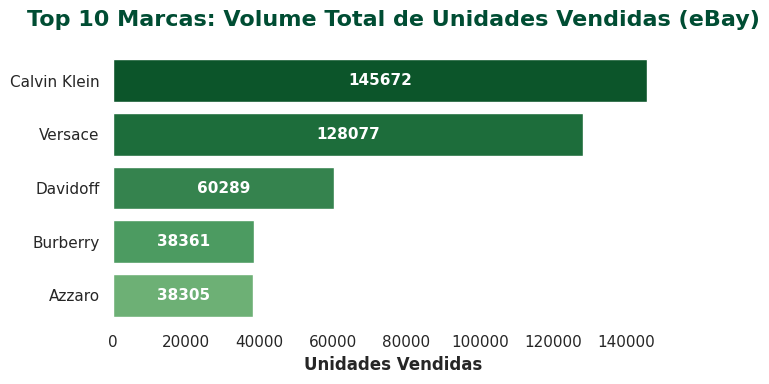

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparação dos dados
top_brands_sales = df.groupby('brand')['sold'].sum().sort_values(ascending=False).head(5)

# 2. Configuração do Estilo e Paleta Boticário
plt.figure(figsize=(7, 4))
sns.set_style("white")

# Criando a paleta degradê de verdes
boticario_palette = sns.color_palette("Greens_r", n_colors=10)

# 3. Criação do Gráfico
bar_plot = sns.barplot(
    x=top_brands_sales.values,
    y=top_brands_sales.index,
    palette=boticario_palette
)

# 4. Customização de Títulos e Eixos
plt.title('Top 10 Marcas: Volume Total de Unidades Vendidas (eBay)',
          fontsize=16, fontweight='bold', color='#004d33', pad=20)
plt.xlabel('Unidades Vendidas', fontsize=12, fontweight='bold')
plt.ylabel('')

# 5. Adicionando os valores DENTRO das barras (Labels Internos)
for i in bar_plot.containers:
    bar_plot.bar_label(
        i,
        label_type='center',  # Posiciona o texto no centro da barra
        fmt='%g',             # Formatação numérica
        fontsize=11,
        fontweight='bold',
        color='white'         # Cor branca para contraste com o verde
    )

# 6. Finalização
sns.despine(left=True, bottom=True) # Limpa o visual removendo eixos
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 4. Geração de Insights e Sumário Estatístico
# ---------------------------------------------------------


In [129]:

print(f"Total de Registros Analisados: {len(df)}")
print(f"Preço Médio Masculino: ${df[df['gender']=='Masculino']['price'].mean():.2f}")
print(f"Preço Médio Feminino: ${df[df['gender']=='Feminino']['price'].mean():.2f}")
print(f"Porcentagem de itens 'Entry-Level' (Testers/Amostras): {(df['is_entry_level'].sum()/len(df))*100:.1f}%")

Total de Registros Analisados: 2000
Preço Médio Masculino: $46.48
Preço Médio Feminino: $39.89
Porcentagem de itens 'Entry-Level' (Testers/Amostras): 15.8%


/tmp/ipython-input-799551282.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


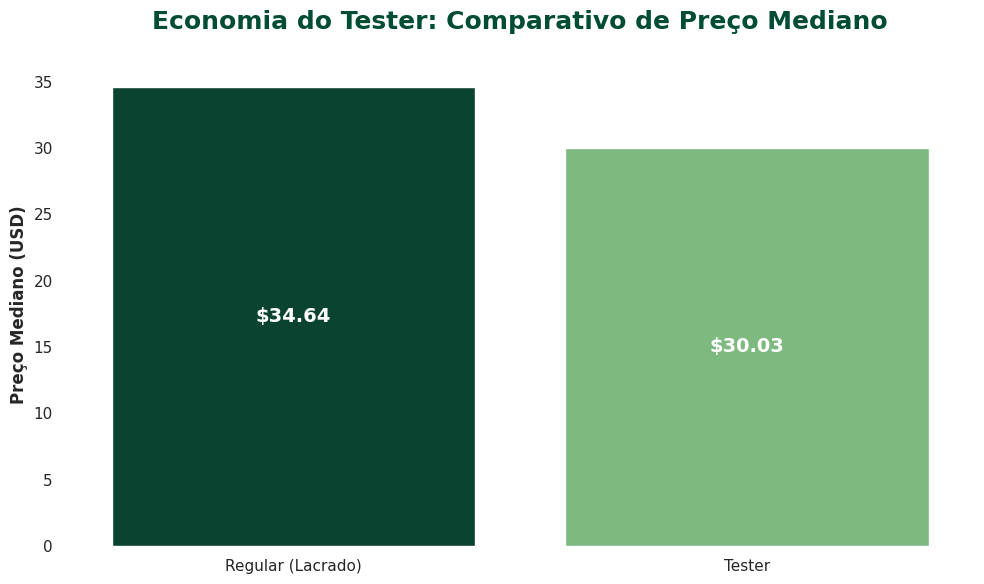

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Classificação dos Itens (Tester vs Regular)
def classify_item(title):
    t = str(title).lower()
    if 'tester' in t or 'testador' in t:
        return 'Tester'
    return 'Regular (Lacrado)'

df['market_segment'] = df['title'].apply(classify_item)

# 2. Agrupamento por Preço Mediano
economy_data = df.groupby('market_segment')['price'].median().sort_values(ascending=False).reset_index()

#economy_data = df.groupby('market_segment')['sold'].sum().sort_values(ascending=False).head(3)

# 3. Configuração Visual
plt.figure(figsize=(10, 6))
sns.set_style("white")

# Paleta Boticário: Verde Escuro (Regular) e Verde Claro (Tester)
boticario_palette = ['#004d33', '#74c476']

# 4. Criação do Gráfico de Barras
bar_plot = sns.barplot(
    data=economy_data,
    x='market_segment',
    y='price',
    palette=boticario_palette
)

# 5. Adicionando os valores DENTRO das barras (em branco)
for i in bar_plot.containers:
    bar_plot.bar_label(
        i,
        label_type='center',  # Centraliza o texto na barra
        fmt='$%.2f',          # Formata como moeda
        fontsize=14,
        fontweight='bold',
        color='white'         # Texto em branco para contraste
    )

# 6. Títulos e Acabamento
plt.title('Economia do Tester: Comparativo de Preço Mediano',
          fontsize=18, fontweight='bold', color='#004d33', pad=25)
plt.ylabel('Preço Mediano (USD)', fontsize=12, fontweight='bold')
plt.xlabel('')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-24202317.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


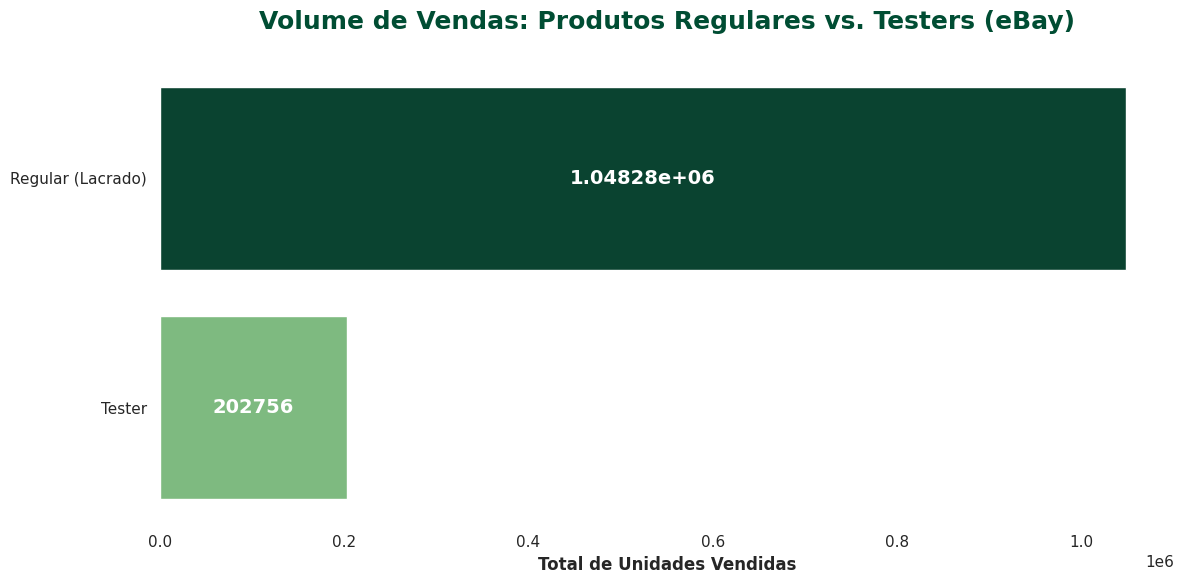

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identificação de Testers vs Regulares
def classify_item(title):
    t = str(title).lower()
    if 'tester' in t or 'testador' in t:
        return 'Tester'
    return 'Regular (Lacrado)'

df['market_segment'] = df['title'].apply(classify_item)

# 2. Agrupamento por Volume de Vendas (Soma da coluna 'sold')
sales_volume = df.groupby('market_segment')['sold'].sum().sort_values(ascending=False).reset_index()

# 3. Configuração Visual (Paleta Boticário)
plt.figure(figsize=(12, 6))
sns.set_style("white")
boticario_palette = ['#004d33', '#74c476']

# 4. Criação do Gráfico de Barras Horizontais
bar_plot = sns.barplot(
    data=sales_volume,
    x='sold',
    y='market_segment',
    palette=boticario_palette
)

# 5. Adicionando as Quantidades Vendidas DENTRO das barras
for i in bar_plot.containers:
    bar_plot.bar_label(
        i,
        label_type='center',
        fmt='%g',
        fontsize=14,
        fontweight='bold',
        color='white'
    )

# 6. Títulos e Acabamento
plt.title('Volume de Vendas: Produtos Regulares vs. Testers (eBay)',
          fontsize=18, fontweight='bold', color='#004d33', pad=25)
plt.xlabel('Total de Unidades Vendidas', fontsize=12, fontweight='bold')
plt.ylabel('')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1074129443.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


AttributeError: 'NoneType' object has no attribute 'get_bbox'

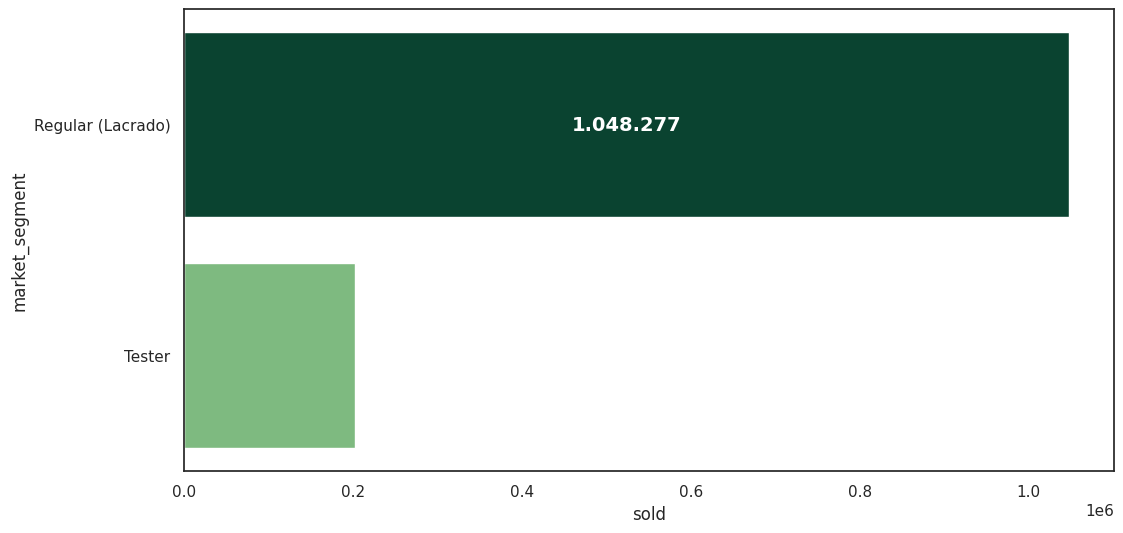

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupamento por Volume de Vendas
sales_volume = df.groupby('market_segment')['sold'].sum().sort_values(ascending=False).reset_index()

# 2. Configuração Visual (Estilo Boticário)
plt.figure(figsize=(12, 6))
sns.set_style("white")
boticario_palette = ['#004d33', '#74c476']

# 3. Criação do Gráfico
bar_plot = sns.barplot(
    data=sales_volume,
    x='sold',
    y='market_segment',
    palette=boticario_palette
)

# 4. Formatação Personalizada: Número com separador de milhar (ponto)
# Criamos os labels formatados (ex: 150.000)
formatted_labels = [f'{int(val):,.0f}'.replace(',', '.') for val in sales_volume['sold']]

# 5. Inserção dos Labels Formatados DENTRO das barras
for i, container in enumerate(bar_plot.containers):
    bar_plot.bar_label(
        container,
        labels=formatted_labels, # Aplica a lista de strings formatadas
        label_type='center',
        fontsize=14,
        fontweight='bold',
        color='white'
    )

# 6. Títulos e Ajustes Finais
plt.title('Volume de Vendas: Produtos Regulares vs. Testers (eBay)',
          fontsize=18, fontweight='bold', color='#004d33', pad=25)
plt.xlabel('Total de Unidades Vendidas', fontsize=12, fontweight='bold')
plt.ylabel('')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

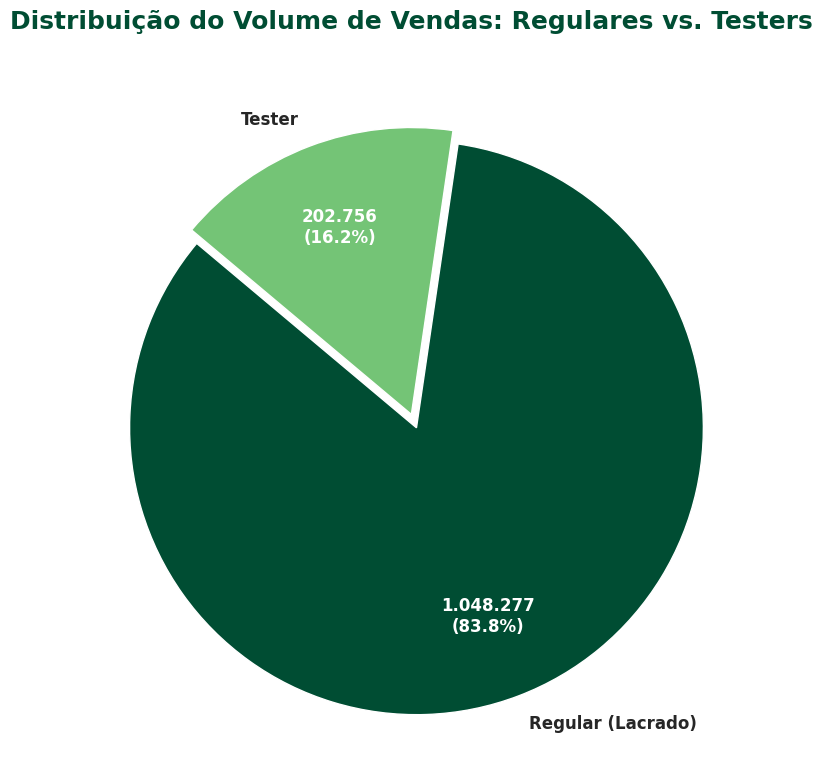

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Agrupamento dos dados (Soma de unidades vendidas)
sales_volume = df.groupby('market_segment')['sold'].sum().sort_values(ascending=False)

# 2. Configuração do Estilo (Cores do Boticário)
plt.figure(figsize=(10, 8))
boticario_palette = ['#004d33', '#74c476']

# Função para exibir Valor Absoluto (com ponto) e Porcentagem
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        formatted_val = f'{val:,.0f}'.replace(',', '.') # Formato 145.672
        return f'{formatted_val}\n({pct:.1f}%)'
    return my_autopct

# 3. Criação do Gráfico de Pizza
wedges, texts, autotexts = plt.pie(
    sales_volume,
    labels=sales_volume.index,
    autopct=make_autopct(sales_volume),
    startangle=140,
    colors=boticario_palette,
    pctdistance=0.7,   # Posiciona o texto mais para o centro
    explode=(0.05, 0), # Pequeno destaque na fatia maior
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# 4. Ajustando os valores internos para a cor BRANCA
for autotext in autotexts:
    autotext.set_color('white')

# 5. Título e Ajustes Finais
plt.title('Distribuição do Volume de Vendas: Regulares vs. Testers',
          fontsize=18, fontweight='bold', color='#004d33', pad=20)

plt.tight_layout()
plt.show()